In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_after_eda_data.xlsx')

In [6]:
data.shape

(3058, 29)

In [7]:
data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/v7_1/V7_val_data_after_eda.xlsx')

In [8]:
data_test.shape

(484, 29)

In [9]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Paybackamount,WriteOff_YN,FundedWriteOffAmount_Gross,WOGross_AdvanceBalance,NetWO,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,Is_this_Business_home_based__c_Yes
0,0062M00000bmHA5QAM,100.0,0.61,1,4,1,0.0,24746.76,3404.0,1,...,11920.0,0,0.0,0.0,0.0,1.0,0,0.086233,0.192806,0
1,0062M00000bmOWPQA2,100.0,0.70,1,0,3,0.0,24746.76,3404.0,0,...,7450.0,0,0.0,0.0,0.0,0.0,0,0.086233,0.077632,1
2,0062M00000bmPVXQA2,100.0,0.60,1,0,1,0.0,24746.76,3404.0,0,...,7300.0,0,0.0,0.0,0.0,0.0,0,0.086233,0.083881,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OpportunityID                          3058 non-null   object 
 1   Renewal_PreviousPace                   3058 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR    3058 non-null   float64
 3   Renewal_CountPreviousDeals             3058 non-null   int64  
 4   Renewal_PreviousCountBounces           3058 non-null   int64  
 5   Renewal_PreviousPosition               3058 non-null   int64  
 6   Renewal_PreviousHBwLCF                 3058 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue        3058 non-null   float64
 8   Renewal_PreviousAvgDailyBalance        3058 non-null   float64
 9   Renewal_TwoWeekBounces                 3058 non-null   int64  
 10  NumberOfBankStatements                 3058 non-null   int64  
 11  Bank

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OpportunityID                          484 non-null    object 
 1   Renewal_PreviousPace                   484 non-null    float64
 2   Renewal_PreviousPaidPercentageOfRTR    484 non-null    float64
 3   Renewal_CountPreviousDeals             484 non-null    int64  
 4   Renewal_PreviousCountBounces           484 non-null    int64  
 5   Renewal_PreviousPosition               484 non-null    int64  
 6   Renewal_PreviousHBwLCF                 484 non-null    float64
 7   Renewal_PreviousAvgMonthRevenue        484 non-null    float64
 8   Renewal_PreviousAvgDailyBalance        484 non-null    float64
 9   Renewal_TwoWeekBounces                 484 non-null    int64  
 10  NumberOfBankStatements                 484 non-null    int64  
 11  BankSt

In [12]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.108562
Renewal_PreviousPaidPercentageOfRTR     -0.092625
Renewal_CountPreviousDeals              -0.075722
Credit_Score__c                         -0.060429
NumberOfBankStatements                  -0.026897
HB_with_LCF_Payment__c                  -0.020211
PctAvgDailybalance2AvgMonthlyDeposits   -0.019012
Renewal_PreviousHBwLCF                  -0.017829
BankStatement_MA_NumReturnItems         -0.001407
Renewal_PreviousPosition                 0.004276
AvgDailybalance                          0.006210
Is_this_Business_home_based__c_Yes       0.007819
Avg_ReturnItemdays                       0.007874
Renewal_PreviousPace                     0.010771
AvgMonthlydeposits                       0.012271
PctChangeInReveune                       0.017240
Renewal_PreviousCountBounces             0.022066
Renewal_PreviousAvgDailyBalance          0.023531
LatestMonth_ReturnItemDays               0.023707
FundedAmount                             0.031039


In [14]:
data.drop(['NetWO','FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.108562
Renewal_PreviousPaidPercentageOfRTR     -0.092625
Renewal_CountPreviousDeals              -0.075722
Credit_Score__c                         -0.060429
NumberOfBankStatements                  -0.026897
HB_with_LCF_Payment__c                  -0.020211
PctAvgDailybalance2AvgMonthlyDeposits   -0.019012
Renewal_PreviousHBwLCF                  -0.017829
BankStatement_MA_NumReturnItems         -0.001407
Renewal_PreviousPosition                 0.004276
AvgDailybalance                          0.006210
Is_this_Business_home_based__c_Yes       0.007819
Avg_ReturnItemdays                       0.007874
Renewal_PreviousPace                     0.010771
AvgMonthlydeposits                       0.012271
PctChangeInReveune                       0.017240
Renewal_PreviousCountBounces             0.022066
Renewal_PreviousAvgDailyBalance          0.023531
LatestMonth_ReturnItemDays               0.023707
FundedAmount                             0.031039


In [15]:
data.shape

(3058, 29)

### Model Training

In [16]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
              'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3058 entries, 0 to 3057
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Renewal_PreviousPace                 3058 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR  3058 non-null   float64
 2   Renewal_CountPreviousDeals           3058 non-null   int64  
 3   Renewal_PreviousCountBounces         3058 non-null   int64  
 4   Renewal_PreviousPosition             3058 non-null   int64  
 5   Renewal_PreviousHBwLCF               3058 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue      3058 non-null   float64
 7   Renewal_PreviousAvgDailyBalance      3058 non-null   float64
 8   Renewal_TwoWeekBounces               3058 non-null   int64  
 9   NumberOfBankStatements               3058 non-null   int64  
 10  BankStatement_MA_OverdraftDays       3058 non-null   float64
 11  BankStatement_MA_NumReturnItem

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [19]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2446, 20)
Shape of x_test is: (612, 20)
----------------------------------------------
Shape of y_train is: (2446,)
Shape of y_test is: (612,)


In [20]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [21]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 24.0%
Percentage of  having WriteOFF_YN = 0: 76.0%


In [23]:
X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
              'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
y_test = data_test['WriteOff_YN']

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
# quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
# quantile_1

1107.02

In [ ]:
# quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
# quantile_2

3713.02

In [ ]:
# quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
# quantile_3

8747.725

In [ ]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

3058

In [24]:
median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
median_WO

3713.02

In [25]:
weight = []
for i in data.index:
  if data['FundedWriteOffAmount_Gross'][i] > median_WO:
    weight.append(2)
  else:
    weight.append(1)
weight = np.array(weight)
len(weight)

3058

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [26]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[50], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
}

In [27]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl, 
                   param_grid=parameters, 
                   scoring='roc_auc',
                   n_jobs=-1, 
                   cv=5, 
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

29

In [28]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=30, reg_lambda=50, subsample=0.75,
              use_label_encoder=False)

In [29]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 30,
 'reg_alpha': 0,
 'reg_lambda': 50,
 'scale_pos_weight': 1,
 'subsample': 0.75,
 'use_label_encoder': False}

In [30]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)

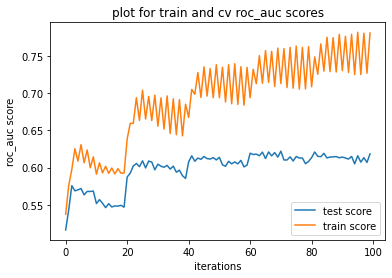

In [31]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [32]:
from sklearn.metrics import precision_score,recall_score

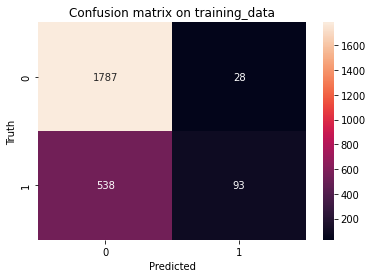

----------------------------
TP: 93
TN: 1787
FP: 28
FN: 538
F1-score: 0.24734042553191488
accuracy: 0.7686017988552739
Precision: 0.768595041322314
Recall: 0.1473851030110935


In [33]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

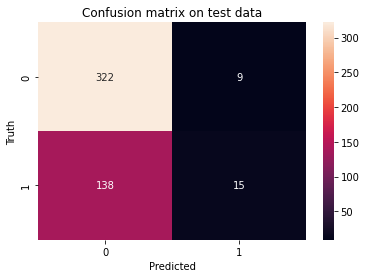

----------------------------
----------------------------
TP: 15
TN: 322
FP: 9
FN: 138
----------------------------
F1-score: 0.1694915254237288
accuracy: 0.6962809917355371
Precision: 0.625
Recall: 0.09803921568627451


In [34]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

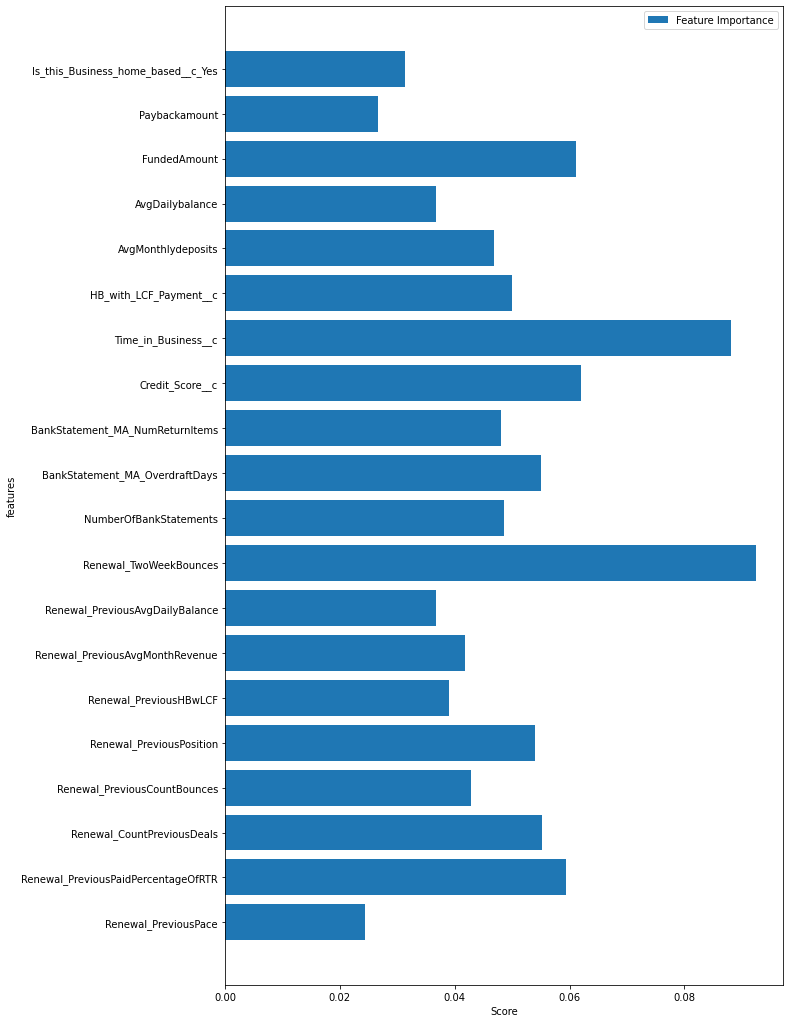

In [35]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

# For Train data

In [36]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
2320,0
2030,1
1373,0
351,0
2916,0
...,...
1638,0
1095,0
1130,0
1294,0


In [38]:
check['Predicted Values'] = predict_y_train

In [39]:
check

,WriteOff_YN,Predicted Values
2320,0,0
2030,1,0
1373,0,0
351,0,0
2916,0,0
...,...,...
1638,0,0
1095,0,0
1130,0,0
1294,0,0


In [40]:
predict_y_proba_train

array([[0.79221344, 0.20778656],
       [0.7153531 , 0.28464693],
       [0.8648805 , 0.13511948],
       ...,
       [0.8190918 , 0.18090819],
       [0.56308186, 0.43691814],
       [0.65772283, 0.34227717]], dtype=float32)

In [41]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])

In [42]:
check['Predicted_Prob_WO = 1'] = write_off1

In [43]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
2320,0,0,0.207787
2030,1,0,0.284647
1373,0,0,0.135119
351,0,0,0.157380
2916,0,0,0.126303
...,...,...,...
1638,0,0,0.248196
1095,0,0,0.342160
1130,0,0,0.180908
1294,0,0,0.436918


In [44]:
check['OpportunityID'] = None

In [45]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
2320,0,0,0.207787,0062M00000mzf3qQAA
2030,1,0,0.284647,0062M00000o7zzhQAA
1373,0,0,0.135119,0062M00000kzXxRQAU
351,0,0,0.157380,0062M00000eOmM3QAK
2916,0,0,0.126303,0062M00000nYcbKQAS
...,...,...,...,...
1638,0,0,0.248196,0062M00000lWDr6QAG
1095,0,0,0.342160,0062M00000j88nVQAQ
1130,0,0,0.180908,0062M00000jLLuyQAG
1294,0,0,0.436918,0062M00000kwjkPQAQ


In [47]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.6720072
Min_propability_value:  0.059288736


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [48]:
check['Decile'] = None

In [49]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2320,0,0,0.207787,0062M00000mzf3qQAA,5
2030,1,0,0.284647,0062M00000o7zzhQAA,7
1373,0,0,0.135119,0062M00000kzXxRQAU,2
351,0,0,0.157380,0062M00000eOmM3QAK,3
2916,0,0,0.126303,0062M00000nYcbKQAS,2
...,...,...,...,...,...
1638,0,0,0.248196,0062M00000lWDr6QAG,6
1095,0,0,0.342160,0062M00000j88nVQAQ,8
1130,0,0,0.180908,0062M00000jLLuyQAG,4
1294,0,0,0.436918,0062M00000kwjkPQAQ,10


In [51]:
check['Predicted_Prob_WO = 1'].max()

0.6720072

In [52]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.43682001531124115

In [53]:
len(check[check['Decile']==10])

245

In [54]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [55]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1290,0,0,0.059289,0062M00000jzvrtQAA,1
1561,0,0,0.061188,0062M00000lVBbAQAW,1
2351,0,0,0.061265,0062M00000mzzDGQAY,1
2407,0,0,0.062632,0062M00000n0sAQQAY,1
1489,0,0,0.063357,0062M00000kyfSlQAI,1
...,...,...,...,...,...
2430,1,1,0.644660,0062M00000n1b1TQAQ,10
118,0,1,0.645101,0062M00000ib8gPQAQ,10
2009,1,1,0.654440,0062M00000nqVlsQAE,10
1853,1,1,0.664146,0062M00000nocrTQAQ,10


In [56]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [57]:
exp_df = check.copy()

In [58]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1290,0,0,0.059289,0062M00000jzvrtQAA,1
1561,0,0,0.061188,0062M00000lVBbAQAW,1
2351,0,0,0.061265,0062M00000mzzDGQAY,1
2407,0,0,0.062632,0062M00000n0sAQQAY,1
1489,0,0,0.063357,0062M00000kyfSlQAI,1
...,...,...,...,...,...
2430,1,1,0.644660,0062M00000n1b1TQAQ,10
118,0,1,0.645101,0062M00000ib8gPQAQ,10
2009,1,1,0.654440,0062M00000nqVlsQAE,10
1853,1,1,0.664146,0062M00000nocrTQAQ,10


In [59]:
# # sorted dataframe
# exp_df = exp_df.sort_values(by=['Predicted_Prob_WO = 1'], ascending = False)

In [60]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1290,0,0,0.059289,0062M00000jzvrtQAA,1
1561,0,0,0.061188,0062M00000lVBbAQAW,1
2351,0,0,0.061265,0062M00000mzzDGQAY,1
2407,0,0,0.062632,0062M00000n0sAQQAY,1
1489,0,0,0.063357,0062M00000kyfSlQAI,1
...,...,...,...,...,...
2430,1,1,0.644660,0062M00000n1b1TQAQ,10
118,0,1,0.645101,0062M00000ib8gPQAQ,10
2009,1,1,0.654440,0062M00000nqVlsQAE,10
1853,1,1,0.664146,0062M00000nocrTQAQ,10


In [61]:
len(exp_df[exp_df['Decile']==1])

245

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [62]:
N = len(exp_df)
N

2446

In [63]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

631

In [64]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    236
1      9
Name: WriteOff_YN, dtype: int64

In [65]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [66]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(9, 15, 29, 34, 44, 62, 75, 90, 115, 158)

In [67]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [68]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(9, 24, 53, 87, 131, 193, 268, 358, 473, 631)

In [69]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [70]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

3.673469387755102 6.122448979591836 11.885245901639344 13.877551020408163 18.0327868852459 25.306122448979593 30.737704918032787 36.734693877551024 47.131147540983605 64.48979591836735


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [71]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [72]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.4263074484944533 3.8034865293185423 8.399366085578446 13.787638668779714 20.760697305863708 30.58637083993661 42.47226624405705 56.735340729001585 74.96038034865293 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [73]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.14263074484944532 0.1901743264659271 0.2799788695192815 0.34469096671949284 0.41521394611727414 0.5097728473322768 0.6067466606293864 0.7091917591125199 0.8328931149850326 1.0


In [74]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]

In [75]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range

[0.12329797,
 0.15232812,
 0.17882557,
 0.20735998,
 0.23562796,
 0.26665488,
 0.3069919,
 0.35380915,
 0.43674952,
 0.6720072]

In [76]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range

[0.059288736,
 0.123421736,
 0.15283312,
 0.17888868,
 0.20737535,
 0.23589534,
 0.26744047,
 0.30716625,
 0.35385057,
 0.4368905]

In [77]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [78]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [79]:
no_of_opps

[245, 245, 244, 245, 244, 245, 244, 245, 244, 245]

In [80]:
funded_amt

[3363395.0,
 3592100.0,
 4311275.0,
 6906150.0,
 5646252.0,
 5027752.0,
 6641642.0,
 6166546.0,
 5229959.0,
 6841664.720000001]

In [81]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.06260189, 0.06685871, 0.0802445 , 0.12854215, 0.10509204,
       0.09358008, 0.12361894, 0.11477612, 0.0973437 , 0.1273419 ])

In [82]:
gross_amt

[62204.05,
 47520.96000000001,
 126584.38999999998,
 271243.4,
 410127.54999999993,
 557671.8900000001,
 399267.7200000001,
 842097.54,
 1189315.53,
 1808805.1]

In [83]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.010884656500323307,
 0.019200020631205524,
 0.041350147567521735,
 0.08881315418814845,
 0.16057853768117136,
 0.25816168479998575,
 0.3280267817489347,
 0.47537960624617026,
 0.6834897054205803,
 1.0]

In [84]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.018494423045761797,
 0.013229297625344508,
 0.029361242323906498,
 0.03927563114036041,
 0.07263713167602154,
 0.11091873465516996,
 0.06011581473376615,
 0.13655902996588365,
 0.22740436970920805,
 0.2643808450174974]

In [85]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded$':funded_amt_pct,
            'Funded_WO_Gross$':gross_amt,
            '%_Funded_WO_Gross$':gross_amt_pct,
            "Cumulative_$_WOs" :cum_gross_pct,
            'Min_Score': min_range,
            'Max_Score': max_range}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Min_Score,Max_Score
0,1,245,9,3.673469,1.426307,0.142631,3363395.00,0.062602,62204.05,0.018494,0.010885,0.059289,0.123298
1,2,245,15,6.122449,3.803487,0.190174,3592100.00,0.066859,47520.96,0.013229,0.019200,0.123422,0.152328
2,3,244,29,11.885246,8.399366,0.279979,4311275.00,0.080244,126584.39,0.029361,0.041350,0.152833,0.178826
3,4,245,34,13.877551,13.787639,0.344691,6906150.00,0.128542,271243.40,0.039276,0.088813,0.178889,0.207360
4,5,244,44,18.032787,20.760697,0.415214,5646252.00,0.105092,410127.55,0.072637,0.160579,0.207375,0.235628
5,6,245,62,25.306122,30.586371,0.509773,5027752.00,0.093580,557671.89,0.110919,0.258162,0.235895,0.266655
6,7,244,75,30.737705,42.472266,0.606747,6641642.00,0.123619,399267.72,0.060116,0.328027,0.267440,0.306992
7,8,245,90,36.734694,56.735341,0.709192,6166546.00,0.114776,842097.54,0.136559,0.475380,0.307166,0.353809
8,9,244,115,47.131148,74.960380,0.832893,5229959.00,0.097344,1189315.53,0.227404,0.683490,0.353851,0.436750
9,10,245,158,64.489796,100.000000,1.000000,6841664.72,0.127342,1808805.10,0.264381,1.000000,0.436891,0.672007


In [86]:
final_df['%_Funded$'] = 100*final_df['%_Funded$']
final_df['%_Funded_WO_Gross$'] = 100*final_df['%_Funded_WO_Gross$']
final_df['Cumulative_$_WOs'] = 100*final_df['Cumulative_$_WOs']
final_df['Min_Score'] = 100 * final_df['Min_Score']
final_df['Max_Score'] = 100 * final_df['Max_Score']
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Min_Score,Max_Score
0,1,245,9,3.673469,1.426307,0.142631,3363395.00,6.260189,62204.05,1.849442,1.088466,5.928874,12.329797
1,2,245,15,6.122449,3.803487,0.190174,3592100.00,6.685871,47520.96,1.322930,1.920002,12.342174,15.232812
2,3,244,29,11.885246,8.399366,0.279979,4311275.00,8.024450,126584.39,2.936124,4.135015,15.283312,17.882557
3,4,245,34,13.877551,13.787639,0.344691,6906150.00,12.854215,271243.40,3.927563,8.881315,17.888868,20.735998
4,5,244,44,18.032787,20.760697,0.415214,5646252.00,10.509204,410127.55,7.263713,16.057854,20.737535,23.562796
5,6,245,62,25.306122,30.586371,0.509773,5027752.00,9.358008,557671.89,11.091873,25.816168,23.589533,26.665487
6,7,244,75,30.737705,42.472266,0.606747,6641642.00,12.361894,399267.72,6.011581,32.802678,26.744047,30.699190
7,8,245,90,36.734694,56.735341,0.709192,6166546.00,11.477612,842097.54,13.655903,47.537961,30.716625,35.380917
8,9,244,115,47.131148,74.960380,0.832893,5229959.00,9.734370,1189315.53,22.740437,68.348971,35.385056,43.674953
9,10,245,158,64.489796,100.000000,1.000000,6841664.72,12.734190,1808805.10,26.438085,100.000000,43.689053,67.200722


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

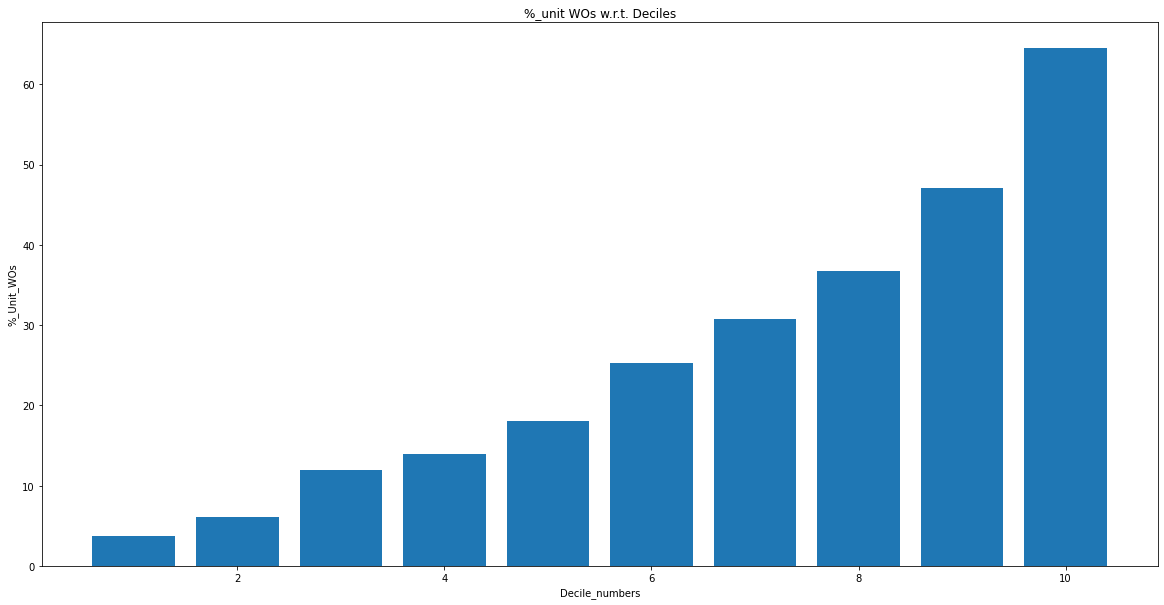

In [87]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WriteOff'])

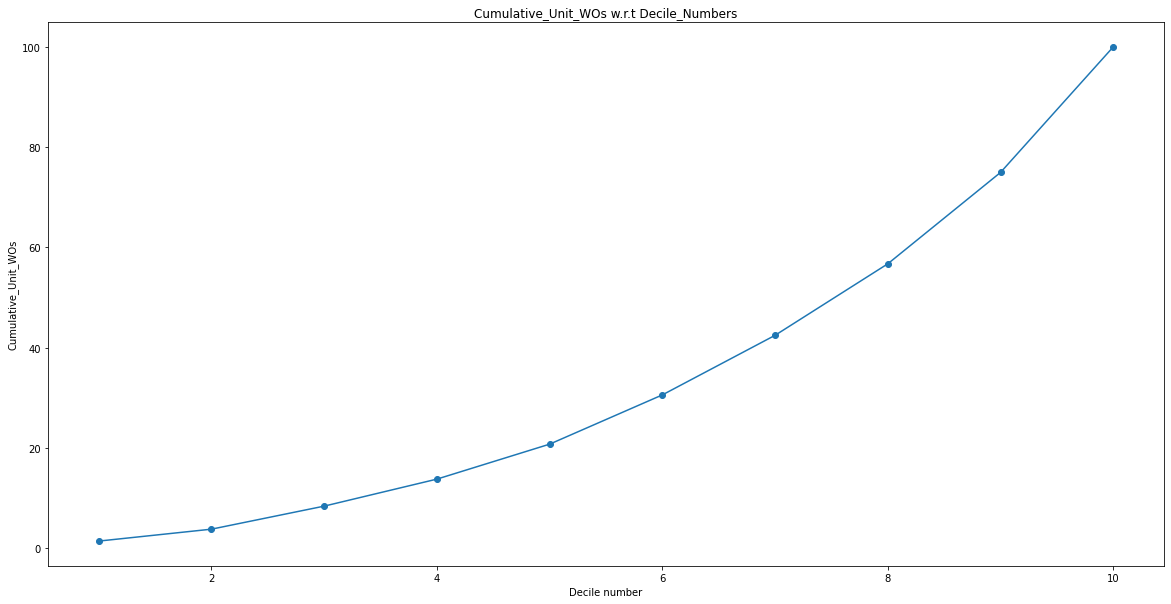

In [88]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

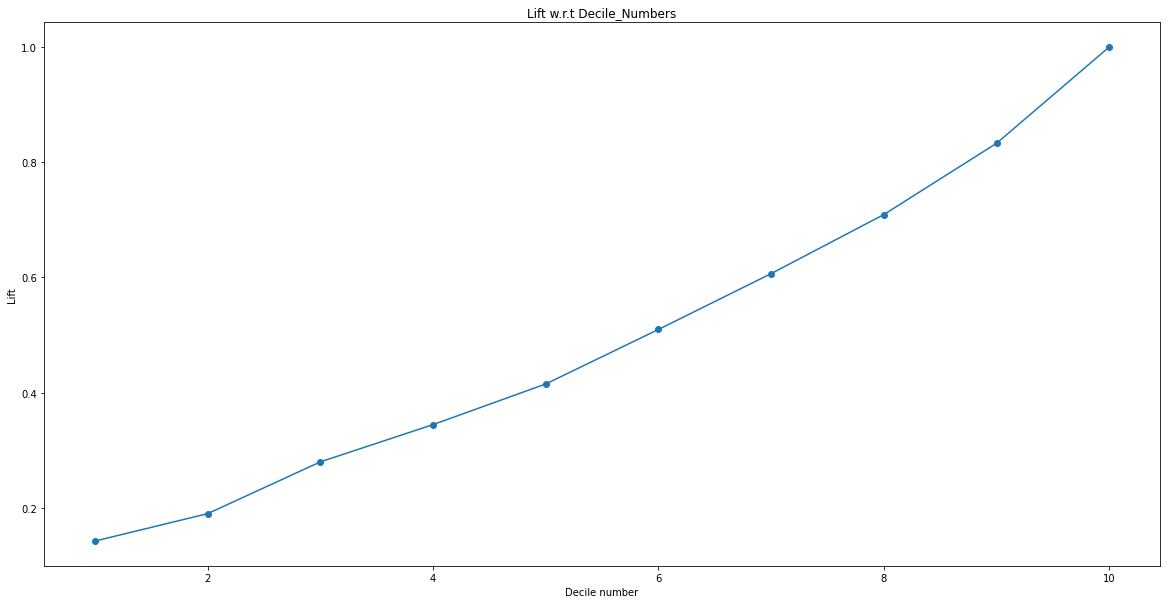

In [89]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Lift'],marker='o')

# For Test data

In [90]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
479,0
480,0
481,0
482,1


In [91]:
check['Predicted Values'] = predict_y_test

In [92]:
check

,WriteOff_YN,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
479,0,0
480,0,0
481,0,0
482,1,0


In [93]:
predict_y_proba_test

array([[0.8909653 , 0.10903472],
       [0.90081954, 0.09918048],
       [0.71330416, 0.28669584],
       [0.7942804 , 0.20571959],
       [0.8067935 , 0.19320647],
       [0.72914124, 0.2708588 ],
       [0.69545376, 0.3045462 ],
       [0.9049272 , 0.09507278],
       [0.7410191 , 0.25898084],
       [0.81042266, 0.18957737],
       [0.8779392 , 0.12206077],
       [0.7188644 , 0.28113562],
       [0.78756446, 0.21243556],
       [0.7938075 , 0.20619252],
       [0.69713455, 0.30286545],
       [0.8211381 , 0.1788619 ],
       [0.7524296 , 0.2475704 ],
       [0.6162112 , 0.38378882],
       [0.60385966, 0.3961403 ],
       [0.7875905 , 0.21240953],
       [0.57321346, 0.42678657],
       [0.78654915, 0.21345085],
       [0.798427  , 0.20157298],
       [0.8538317 , 0.14616829],
       [0.76432335, 0.23567663],
       [0.7764441 , 0.22355595],
       [0.7824872 , 0.21751277],
       [0.67643607, 0.32356393],
       [0.76528263, 0.23471737],
       [0.744851  , 0.25514898],
       [0.

In [94]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [95]:
check['Predicted_Prob_WO = 1'] = write_off1

In [96]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,0,0.109035
1,0,0,0.099180
2,0,0,0.286696
3,0,0,0.205720
4,0,0,0.193206
...,...,...,...
479,0,0,0.313180
480,0,0,0.082886
481,0,0,0.285784
482,1,0,0.243614


In [97]:
check['OpportunityID'] = None

In [98]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,0,0.109035,0062M00000bmHA5QAM
1,0,0,0.099180,0062M00000bmOWPQA2
2,0,0,0.286696,0062M00000bmPVXQA2
3,0,0,0.205720,0062M00000bnH0vQAE
4,0,0,0.193206,0062M00000bmlCWQAY
...,...,...,...,...
479,0,0,0.313180,0062M00000gZCzBQAW
480,0,0,0.082886,0062M00000gAaZvQAK
481,0,0,0.285784,0062M00000gABm9QAG
482,1,0,0.243614,0062M00000gALKVQA4


In [100]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.6755718
Min_propability_value:  0.062387817


In [101]:
check['Decile'] = None

In [102]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [103]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,0,0.109035,0062M00000bmHA5QAM,1
1,0,0,0.099180,0062M00000bmOWPQA2,1
2,0,0,0.286696,0062M00000bmPVXQA2,7
3,0,0,0.205720,0062M00000bnH0vQAE,4
4,0,0,0.193206,0062M00000bmlCWQAY,4
...,...,...,...,...,...
479,0,0,0.313180,0062M00000gZCzBQAW,8
480,0,0,0.082886,0062M00000gAaZvQAK,1
481,0,0,0.285784,0062M00000gABm9QAG,7
482,1,0,0.243614,0062M00000gALKVQA4,6


In [104]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [105]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
207,0,0,0.062388,0062M00000iryHoQAI,1
328,0,0,0.068525,0062M00000djfXwQAI,1
330,1,0,0.071869,0062M00000djgNeQAI,1
98,0,0,0.073912,0062M00000dHGb6QAG,1
407,0,0,0.075932,0062M00000eR7HsQAK,1
...,...,...,...,...,...
357,0,1,0.632383,0062M00000ePAlUQAW,10
388,0,1,0.633673,0062M00000eQ5rDQAS,10
391,1,1,0.647942,0062M00000eQDnlQAG,10
295,1,1,0.669660,0062M00000diEwPQAU,10


In [106]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [107]:
exp_df = check.copy()

In [108]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
207,0,0,0.062388,0062M00000iryHoQAI,1
328,0,0,0.068525,0062M00000djfXwQAI,1
330,1,0,0.071869,0062M00000djgNeQAI,1
98,0,0,0.073912,0062M00000dHGb6QAG,1
407,0,0,0.075932,0062M00000eR7HsQAK,1
...,...,...,...,...,...
357,0,1,0.632383,0062M00000ePAlUQAW,10
388,0,1,0.633673,0062M00000eQ5rDQAS,10
391,1,1,0.647942,0062M00000eQDnlQAG,10
295,1,1,0.669660,0062M00000diEwPQAU,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [109]:
N = len(exp_df)
N

484

In [110]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

153

In [111]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    38
1    13
Name: WriteOff_YN, dtype: int64

In [112]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [113]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(13, 3, 13, 10, 18, 19, 13, 17, 23, 24)

In [114]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [115]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(13, 16, 29, 39, 57, 76, 89, 106, 129, 153)

In [116]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [117]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

25.49019607843137 8.333333333333334 27.083333333333332 17.857142857142858 36.734693877551024 37.254901960784316 25.49019607843137 43.58974358974359 41.81818181818182 50.0


In [118]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [119]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

8.49673202614379 10.457516339869281 18.954248366013072 25.49019607843137 37.254901960784316 49.673202614379086 58.16993464052288 69.28104575163398 84.31372549019608 100.0


In [120]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.8496732026143791 0.5228758169934641 0.6318082788671024 0.6372549019607843 0.7450980392156863 0.8278867102396514 0.830999066293184 0.8660130718954248 0.9368191721132898 1.0


In [121]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]

In [122]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [123]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [124]:
no_of_opps

[51, 36, 48, 56, 49, 51, 51, 39, 55, 48]

In [125]:
sum([55, 41, 52, 58, 53, 32, 61, 39, 45, 48])

484

In [126]:
funded_amt

[1393521.0,
 619625.0,
 1693300.0,
 1412389.92,
 931242.0,
 1222600.0,
 714262.0,
 662745.0,
 1015300.0,
 984846.93]

In [127]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.13084911, 0.05818167, 0.15899782, 0.13262087, 0.08744194,
       0.11479993, 0.06706791, 0.06223056, 0.09533484, 0.09247535])

In [128]:
gross_amt

[178669.66,
 37163.2,
 10769.0,
 251360.83,
 240695.0,
 138135.56,
 99617.88,
 32860.78,
 257368.08000000002,
 93600.68]

In [129]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.133311623799627,
 0.16104037493504805,
 0.169075498954975,
 0.3566245232656609,
 0.536215402268012,
 0.6392831296486474,
 0.7136114814363901,
 0.738130047941315,
 0.9301612896137528,
 1.0]

In [130]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.1282145443089842,
 0.059976921525115995,
 0.006359770861631134,
 0.17796843948022512,
 0.2584666499148449,
 0.11298508097497137,
 0.13946966239279146,
 0.04958284106255045,
 0.25348968777701175,
 0.09504084050909312]

In [131]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            'Funded$_%':funded_amt_pct,
            'Funded_WO_Gross':gross_amt,
            'Funded_WO_Gross$_%':gross_amt_pct,
            "Cumulative_$ WOs" :cum_gross_pct,
            'Min_Score': min_range,
            'Max_Score': max_range}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Min_Score,Max_Score
0,1,51,13,25.490196,8.496732,0.849673,1393521.00,0.130849,178669.66,0.128215,0.133312,0.059289,0.123298
1,2,36,3,8.333333,10.457516,0.522876,619625.00,0.058182,37163.20,0.059977,0.161040,0.123422,0.152328
2,3,48,13,27.083333,18.954248,0.631808,1693300.00,0.158998,10769.00,0.006360,0.169075,0.152833,0.178826
3,4,56,10,17.857143,25.490196,0.637255,1412389.92,0.132621,251360.83,0.177968,0.356625,0.178889,0.207360
4,5,49,18,36.734694,37.254902,0.745098,931242.00,0.087442,240695.00,0.258467,0.536215,0.207375,0.235628
5,6,51,19,37.254902,49.673203,0.827887,1222600.00,0.114800,138135.56,0.112985,0.639283,0.235895,0.266655
6,7,51,13,25.490196,58.169935,0.830999,714262.00,0.067068,99617.88,0.139470,0.713611,0.267440,0.306992
7,8,39,17,43.589744,69.281046,0.866013,662745.00,0.062231,32860.78,0.049583,0.738130,0.307166,0.353809
8,9,55,23,41.818182,84.313725,0.936819,1015300.00,0.095335,257368.08,0.253490,0.930161,0.353851,0.436750
9,10,48,24,50.000000,100.000000,1.000000,984846.93,0.092475,93600.68,0.095041,1.000000,0.436891,0.672007


In [132]:
final_df['Funded$_%'] = 100*final_df['Funded$_%']
final_df['Funded_WO_Gross$_%'] = 100*final_df['Funded_WO_Gross$_%']
final_df['Cumulative_$ WOs'] = 100*final_df['Cumulative_$ WOs']
final_df['Min_Score'] = 100*final_df['Min_Score']
final_df['Max_Score'] = 100*final_df['Max_Score']
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,Funded$_%,Funded_WO_Gross,Funded_WO_Gross$_%,Cumulative_$ WOs,Min_Score,Max_Score
0,1,51,13,25.490196,8.496732,0.849673,1393521.00,13.084911,178669.66,12.821454,13.331162,5.928874,12.329797
1,2,36,3,8.333333,10.457516,0.522876,619625.00,5.818167,37163.20,5.997692,16.104037,12.342174,15.232812
2,3,48,13,27.083333,18.954248,0.631808,1693300.00,15.899782,10769.00,0.635977,16.907550,15.283312,17.882557
3,4,56,10,17.857143,25.490196,0.637255,1412389.92,13.262087,251360.83,17.796844,35.662452,17.888868,20.735998
4,5,49,18,36.734694,37.254902,0.745098,931242.00,8.744194,240695.00,25.846665,53.621540,20.737535,23.562796
5,6,51,19,37.254902,49.673203,0.827887,1222600.00,11.479993,138135.56,11.298508,63.928313,23.589533,26.665487
6,7,51,13,25.490196,58.169935,0.830999,714262.00,6.706791,99617.88,13.946966,71.361148,26.744047,30.699190
7,8,39,17,43.589744,69.281046,0.866013,662745.00,6.223056,32860.78,4.958284,73.813005,30.716625,35.380917
8,9,55,23,41.818182,84.313725,0.936819,1015300.00,9.533484,257368.08,25.348969,93.016129,35.385056,43.674953
9,10,48,24,50.000000,100.000000,1.000000,984846.93,9.247535,93600.68,9.504084,100.000000,43.689053,67.200722


<BarContainer object of 10 artists>

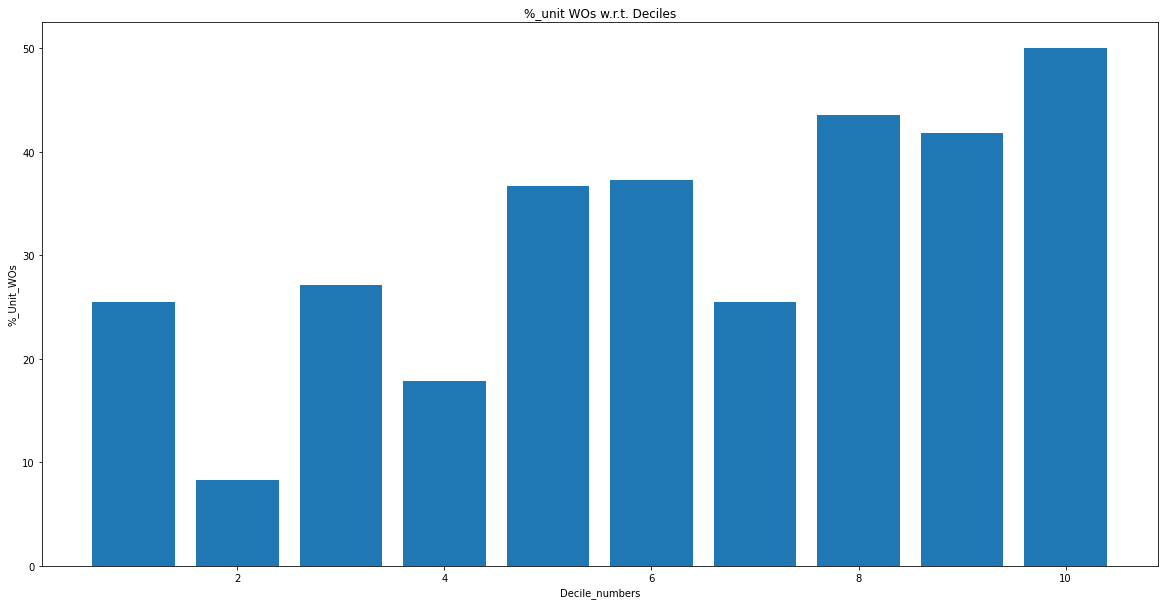

In [133]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WriteOff'])

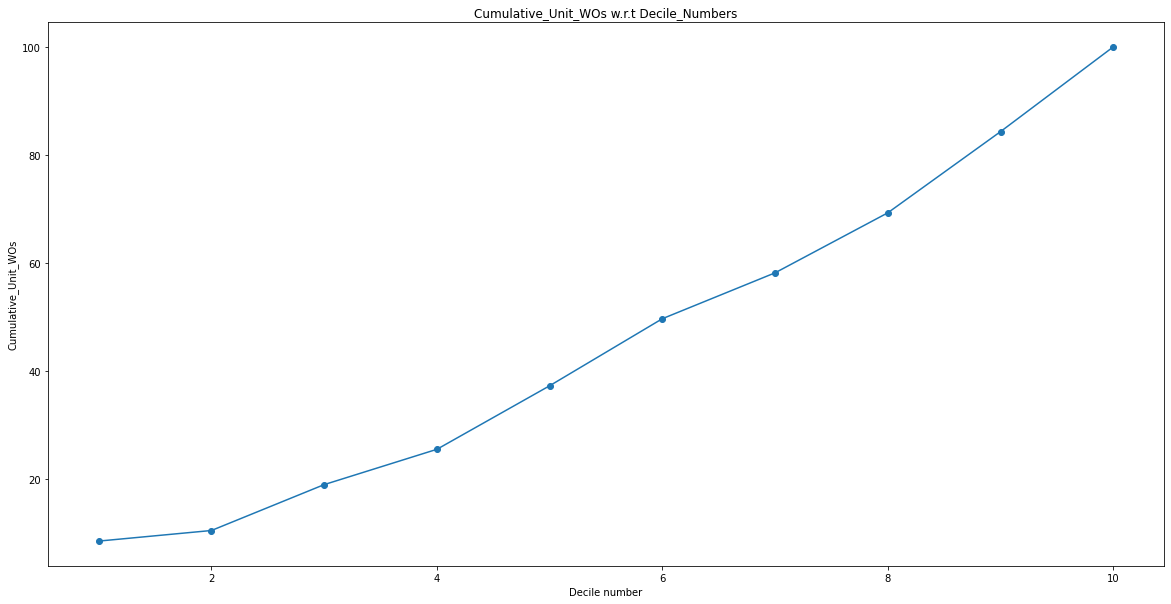

In [134]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

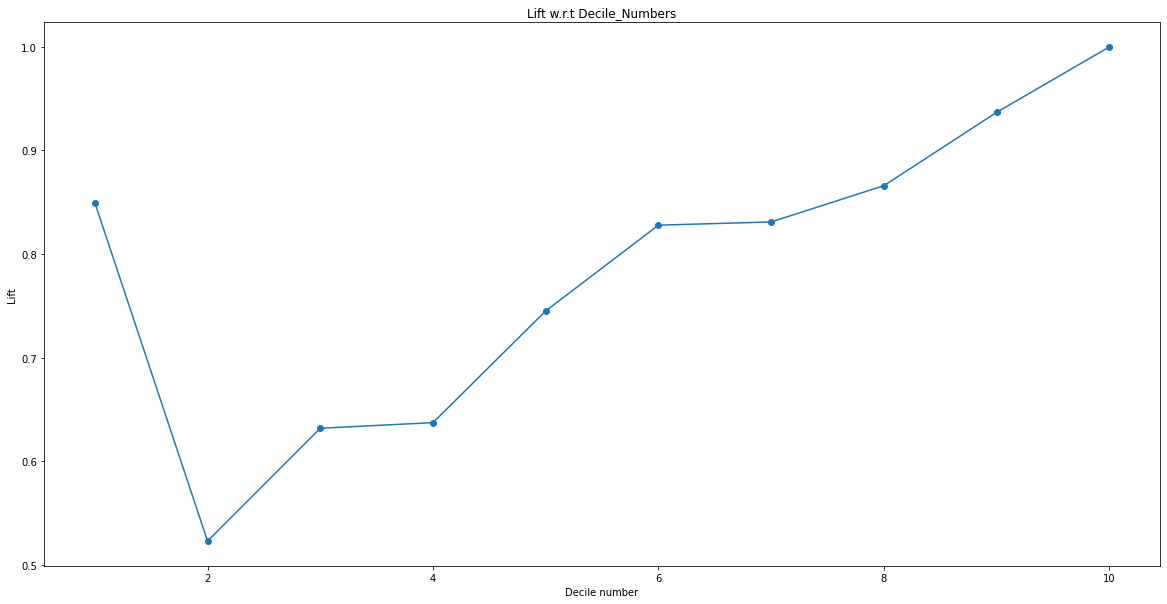

In [135]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Lift'],marker='o')

## Points to be noted 
* Got 6 new attributes - slide 53
* Comparison with Logistic Regression